<h4> Code Produced by Thomas Ho</h4>
2024-05-14

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation

In [ ]:
df1 = pd.read_csv('../data/gem_1.csv')
df2 = pd.read_csv('../data/gem_2.csv')

combined_df = pd.concat([df1, df2], ignore_index=True)

# Extract spatial and signal components
x = combined_df['X']
y = combined_df['Y']
frequencies = [450, 1530, 5310, 18330, 63030]

tri = Triangulation(x, y)

FileNotFoundError: [Errno 2] No such file or directory: 'data/01-xg-03oc-07d_gem.csv'

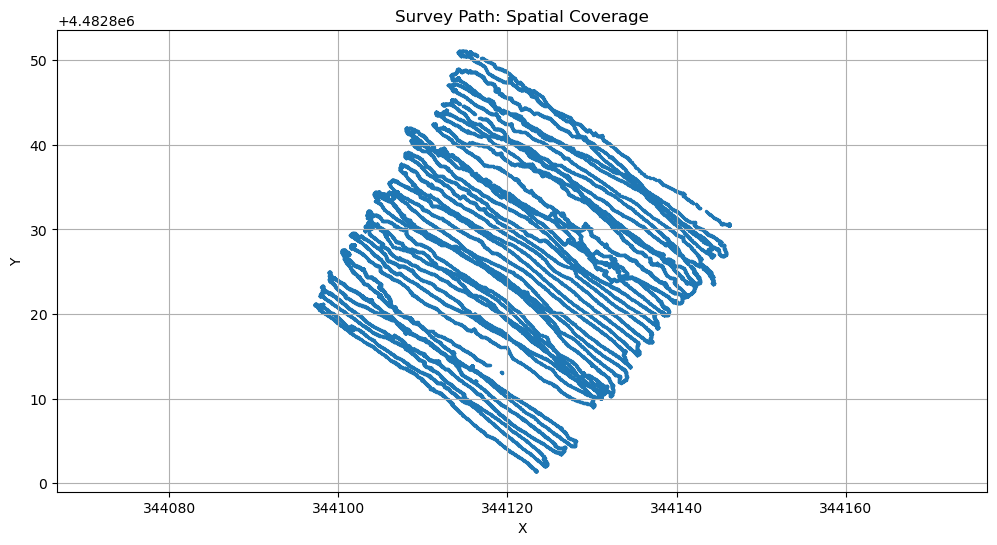

In [18]:
# Spatial Coverage
plt.figure(figsize=(12, 6))
plt.scatter(x, y, s=2)
plt.title("Survey Path: Spatial Coverage")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis('equal')
plt.grid(True)
plt.show()

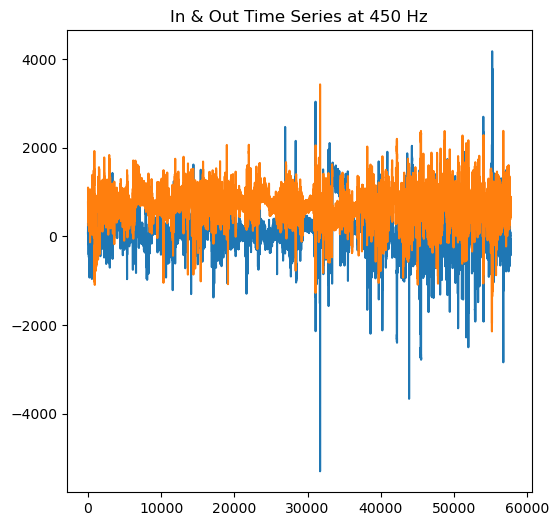

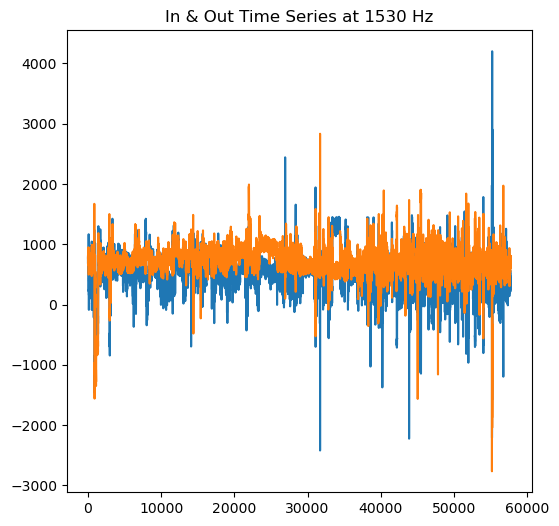

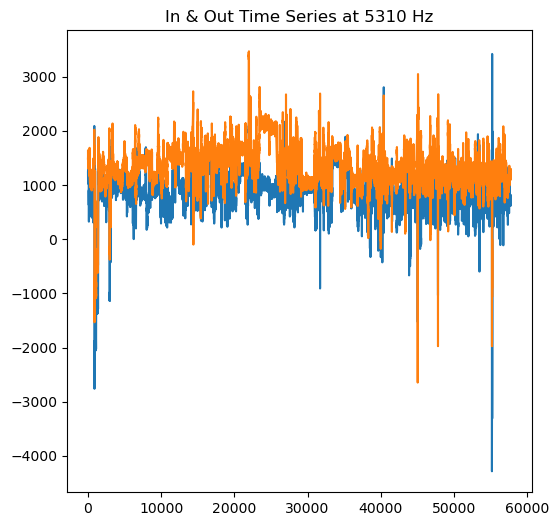

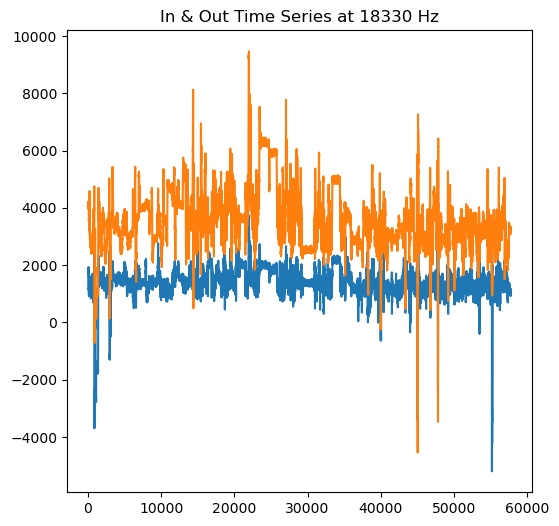

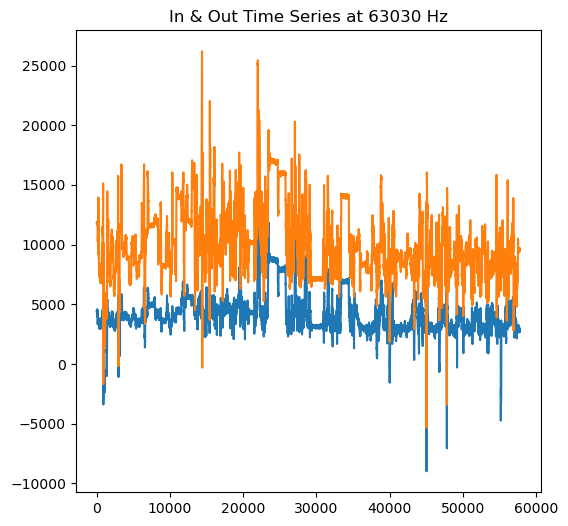

In [22]:
for f in frequencies:
    plt.figure(figsize=(6, 6))
    plt.plot(combined_df[f'I_{f}Hz'], label=f'I_{f}Hz')
    plt.plot(combined_df[f'Q_{f}Hz'], label=f'Q_{f}Hz')
    plt.title(f'In & Out Time Series at {f} Hz') 


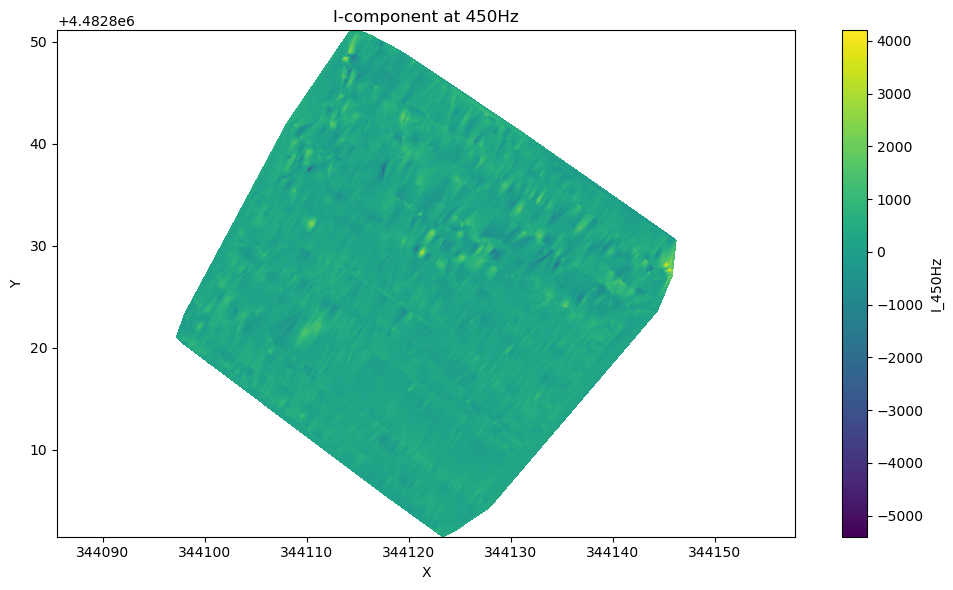

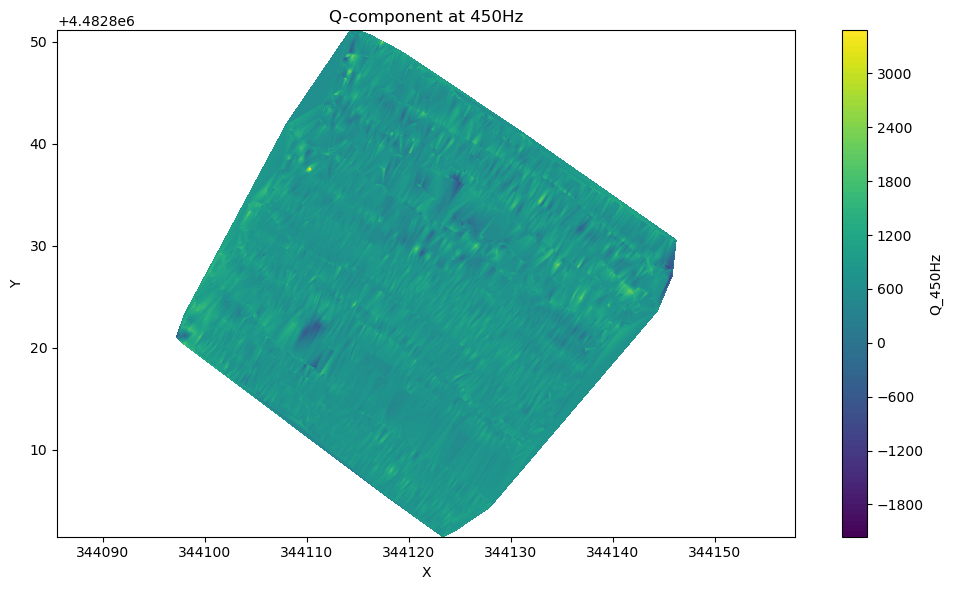

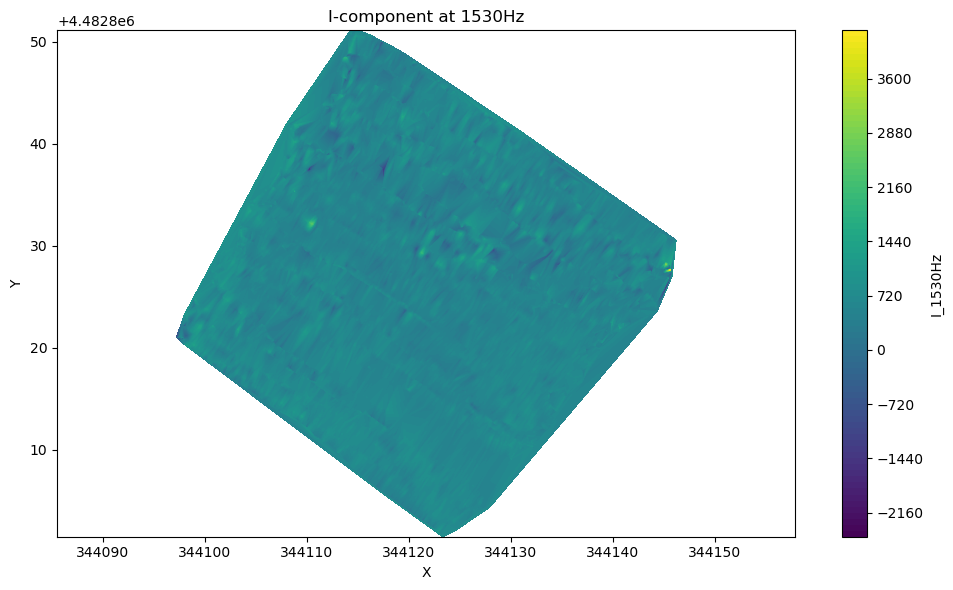

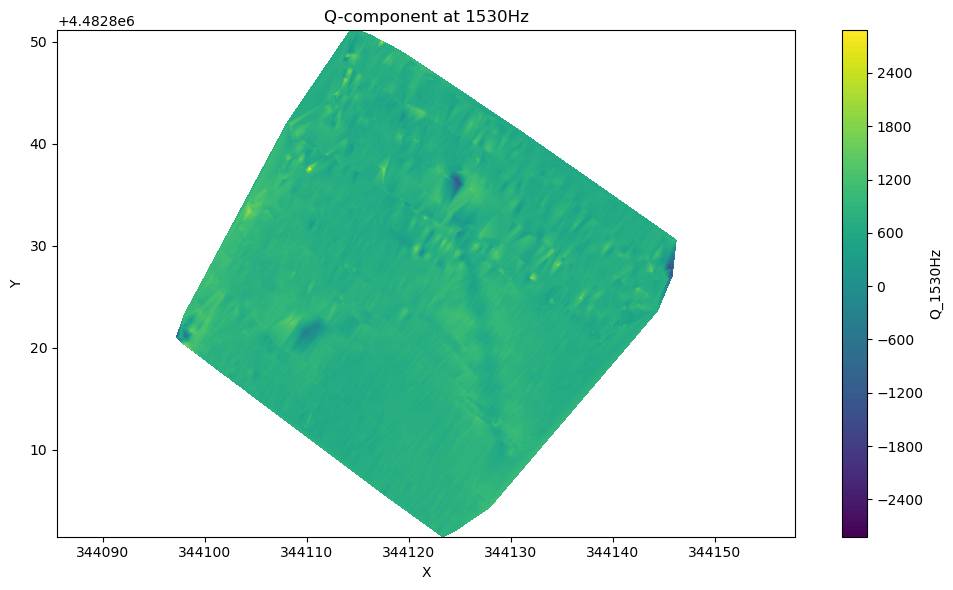

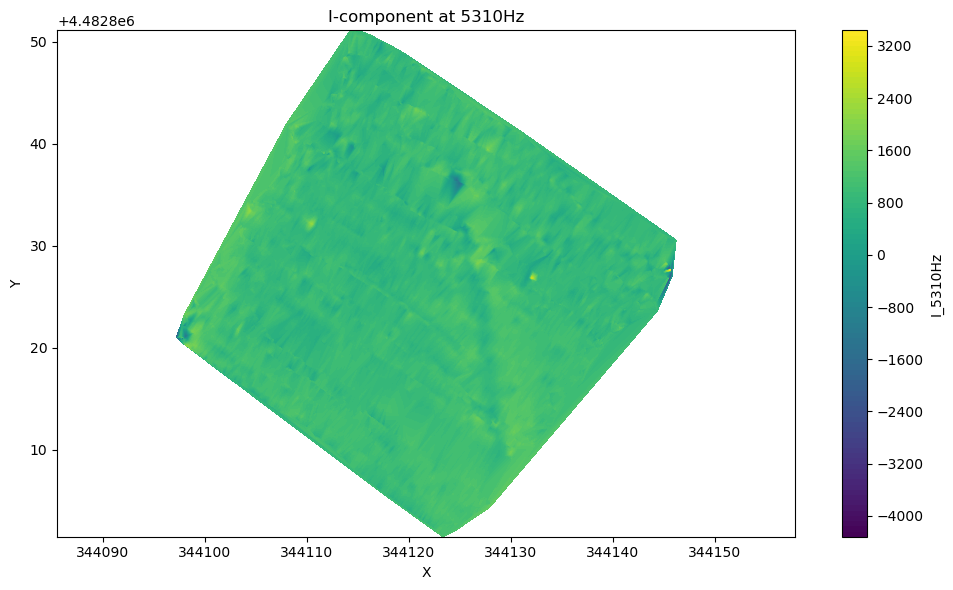

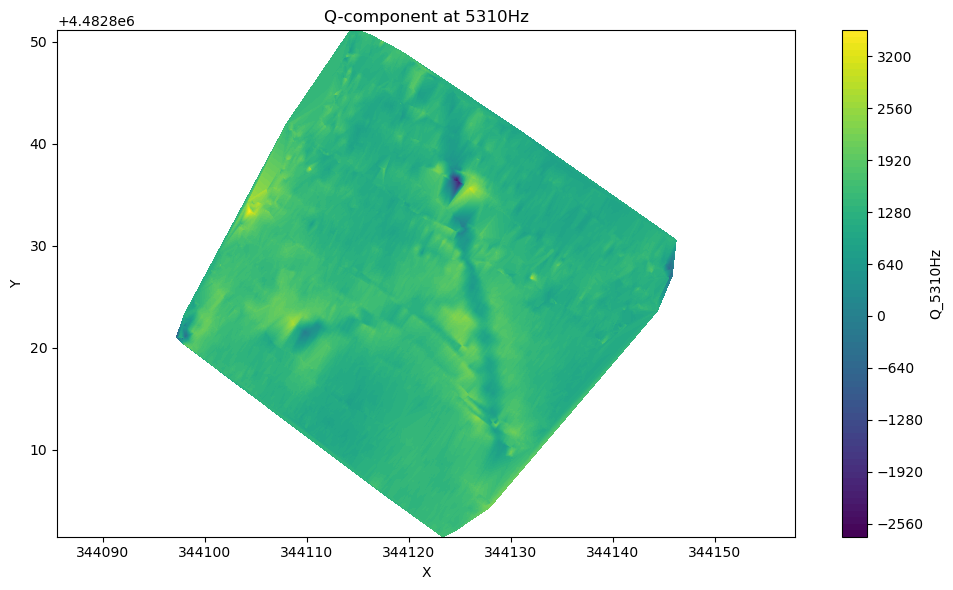

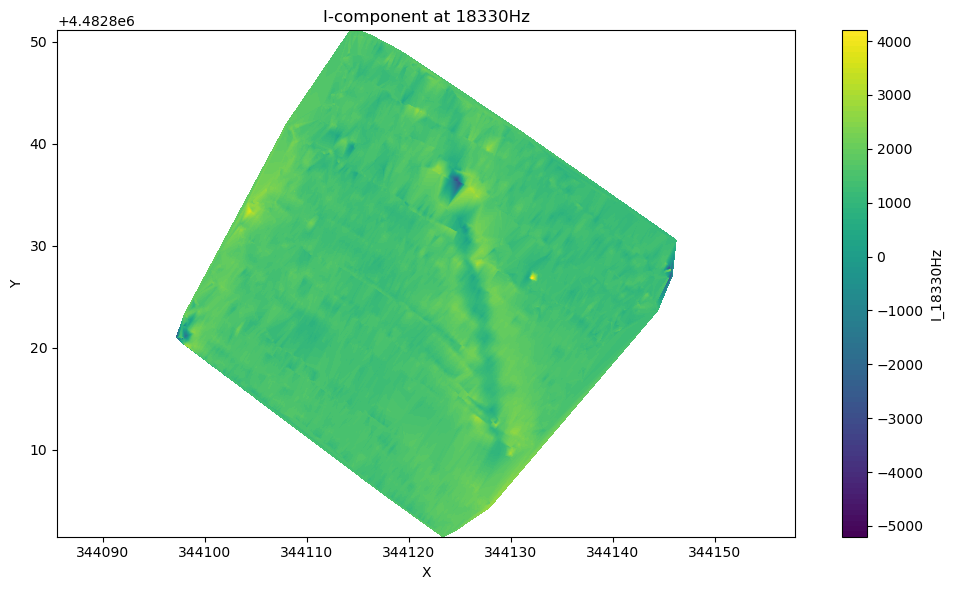

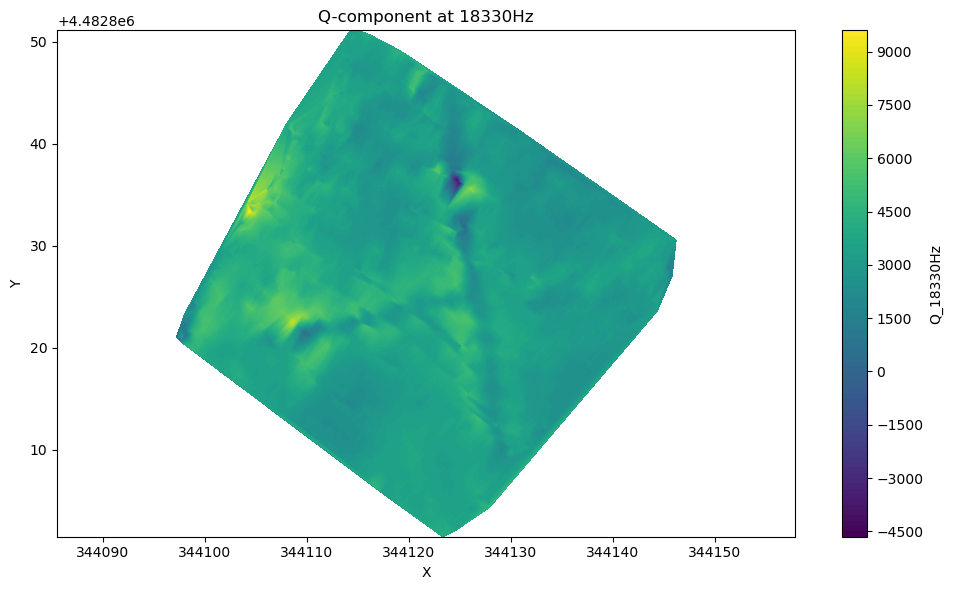

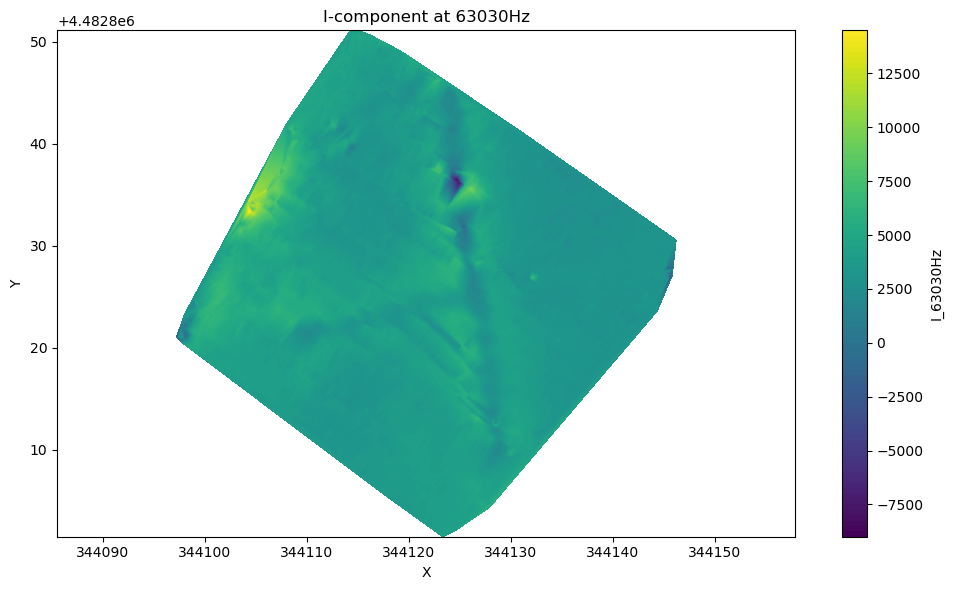

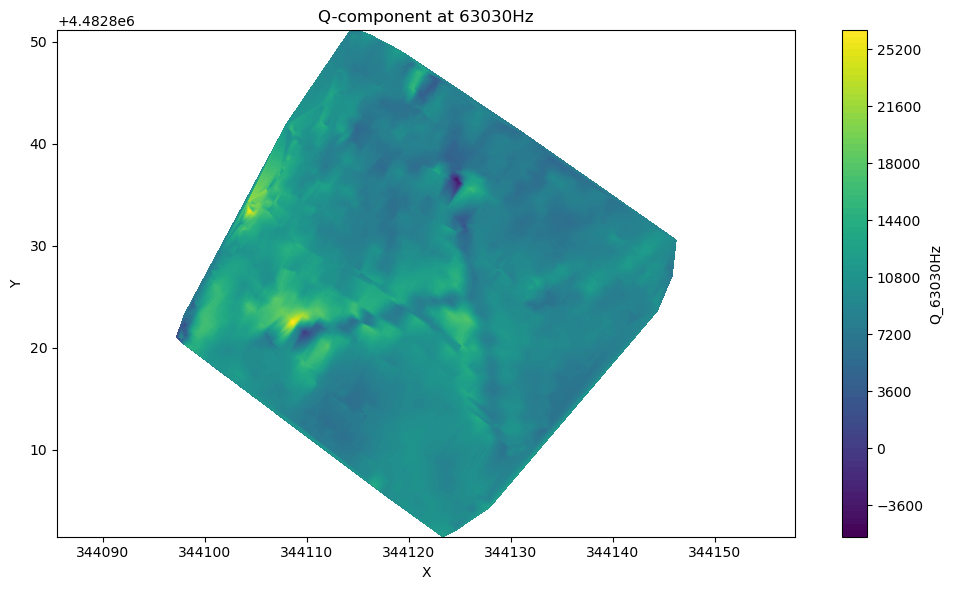

In [24]:
for freq in frequencies:
    for comp in ['I', 'Q']:
        if f'{comp}_{freq}Hz' in combined_df.columns:
            plt.figure(figsize=(10, 6))
            plt.tricontourf(tri, combined_df[f'{comp}_{freq}Hz'], levels=100, cmap='viridis')
            plt.colorbar(label=f'{comp}_{freq}Hz')
            plt.title(f'{comp}-component at {freq}Hz')
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.axis('equal')
            plt.tight_layout()
            plt.show()

In [ ]:
#Individual Points
sample = combined_df.iloc[0]
inphase = [sample['I_450Hz'], sample['I_1530Hz'], sample['I_18330Hz'], sample['I_63030Hz']]
quadrature = [sample['Q_450Hz'], sample['Q_1530Hz'], sample['Q_18330Hz'], sample['Q_63030Hz']]
freqs = [450, 1530, 18330, 63030]

figure, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols=3, figsize = (17,6))
ax1.plot(inphase, freqs, '--', label = 'In-phase')
ax1.plot(quadrature, freqs, '--', label = 'Quadrature')
ax1.scatter(inphase, freqs)
ax1.scatter(quadrature, freqs)
ax1.set_ylabel('Frequencies (Hz)')
ax1.set_xlabel('Parts per Million(PPM)')
ax1.set_title('In-Phase and Quadrature as a funtion of Frequency')
ax1.legend()
ax2.plot(inphase, freqs, '--')
ax2.scatter(inphase, freqs)
ax2.set_ylabel('Frequencies (Hz)')
ax2.set_xlabel('In-phase (PPM)')
ax2.set_title('In-phase as a function of Frequency')
ax3.plot(quadrature, freqs, '--')
ax3.scatter(quadrature, freqs)
ax3.set_ylabel('Frequencies (Hz)')
ax3.set_xlabel('Quadrature (PPM)')
ax3.set_title('Quadrature as a function of Frequency')

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(x, y, s=2)
plt.title("Survey Path: Spatial Coverage")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis('equal')
plt.grid(True)
plt.scatter(sample['X'], sample['Y'])
#cbar = plt.colorbar()
plt.show()